In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

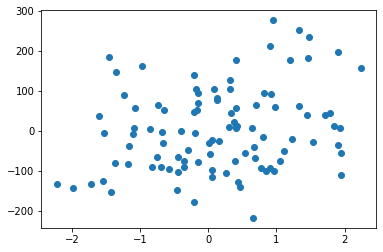

In [3]:
np.random.seed(0) # Pour maitriser l’aléatoire
x, y = make_regression(n_samples=100, n_features=2, noise=10) # permet de générer un nuage de points
# x ne sera plus un vecteur mais une matrice de 100 lignes et de deux colonnes
plt.scatter(x[:,0], y)

In [4]:
# Vérification des dimensions de nos matrices
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [5]:
# Colonne de "biais" (colonne de "1")
# matrice X
X = np.hstack((x, np.ones((x.shape[0], 1)))) # permet de coller ensemble deux vecteurs numpy l'un à côté de l'autre
# ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [6]:
# On doit quand même initialiser theta avec des paramètres aléatoires 
theta = np.random.randn(3, 1) # dimensions du vecteur theta
theta.shape
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

Modèle

In [7]:
# F = X.theta
def model(X, theta): 
    return X.dot(theta)

In [8]:
model(X[:10], theta)

array([[-1.906574  ],
       [-0.39306659],
       [ 0.75597011],
       [-1.05774263],
       [-0.84588142],
       [-2.72171804],
       [ 1.61893306],
       [ 0.27577823],
       [ 2.07682005],
       [-0.38644272]])

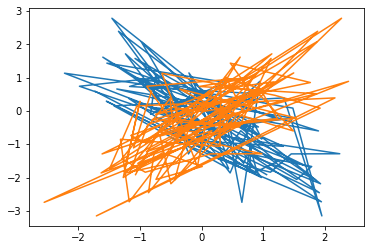

In [9]:
plt.plot(x, model(X, theta))

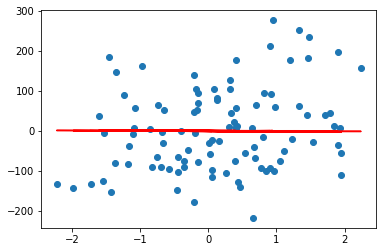

In [10]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], model(X, theta), c='r')

Fonction coût (erreur quadratique moyenne)

In [11]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [12]:
cost_function(X, y, theta)

5294.071342926028

Gradient et Descente de Gradient

In [13]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [14]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        
    return theta

In [15]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # tableau de zéros
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta) # on enregistre le coût de notre modèle pour chaue itération
    return theta, cost_history

Machine Learning

In [16]:
theta_final = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [17]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [18]:
theta_final

array([[28.67154616],
       [97.29524926],
       [-0.511481  ]])

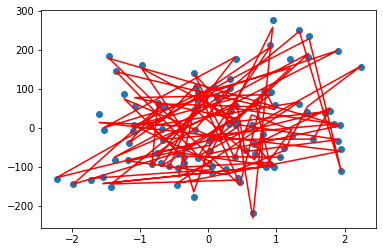

In [19]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.plot(x[:,0], predictions, c='r')

Courbe d'apprentissage

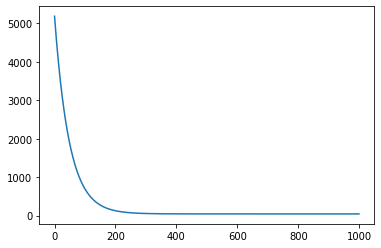

In [20]:
plt.plot(range(1000), cost_history) # range(1000) = 1000 itérations de notre descente de gradient

Evaluation finale

In [21]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [22]:
coef_determination(y, predictions)

0.9916687122277607

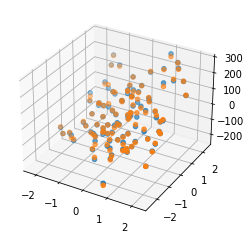

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)